# Linear Air Resistance, Spin, etc.

Import usual suspects

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('dark_background') # you can comment out this line if you are not using a dark background

Define our favorite ODE solver (but feel free to try others)

In [2]:
def Euler(diffeq,dof,dt):
    """
    Euler method for ODEs:
    Given the degrees of freedom at time t
    Returns the degrees of freedom at time t+dt
    """
    ddofdt=diffeq(dof) # get (d/dt)dof at time t
    return dof + dt*ddofdt

Define the righthand sides of the first order differential equations associated with linear drag. The formulas are very similar to the projectile motion, plus a term $\vec{F}_1=-b_1\vec{v}$

In [5]:
def linear_drag(dof):
    """
    """
    ddofdt=np.zeros(4)
    ddofdt[0]=dof[2] # dx/dt = vx
    ddofdt[1]=dof[3] # dy/dt = vy
    ddofdt[2]=-b1*dof[2]/m # dvx/dt = - b1 * vx / m
    ddofdt[3]=a-b1*dof[3]/m # dvy/dt = - g - b1 * vy /m
    return ddofdt

Setup physical parameters of the simulation: initial conditions, mass, drag, gravity

In [35]:
v0=20. # initial speed in m/s
theta=np.pi/4. # launching angle in rad
dof0=[0.,0.,v0*np.cos(theta),v0*np.sin(theta)] # initial position and velocity of the projectile
m=0.5 # mass of the ball in kg
b1=0.2 # drag coefficient in S.I. units
b=b1/m # scaled drag
a=-9.8 # acceleration due to gravity

Here we run the simulation. Note that the timestep is a numerical parameter (has no physical meaning) that you may want to optimize, so that the truncation error in the trajectory is small. 

In [32]:
dt = 0.1 # This controls the accuracy of the algorithm
times=[0.] # Setup a container to store the times along the trajectory
lenghts=[dof0[0]] # Setup a container to store the horizontal position along the trajectory
heights=[dof0[0]] # Setup a container to store the vertical position along the trajectory
dof=dof0.copy() # we copy the initial conditions, as we don't want to overwrite them, we may use them in the following. 
# note that in the above we use the array.copy() method, as the = operator has a different meaning for arrays
while True: # this is an infinite loop, make sure you break it somewhere
    dof=Euler(linear_drag,dof,dt)
    if dof[1] < 0. : break # when the ball reaches the floor, exit the loop
    lenghts.append(dof[0]) # otherwise, save the position of the ball
    heights.append(dof[1]) # otherwise, save the position of the ball
    times.append(times[-1]+dt) # and the corresponding time

Assignment 2A: compare the numeric solutions obtained with Euler (or RK2, or RK4) integrator with the analytic formula (Eq. 3.16 of the textbook)

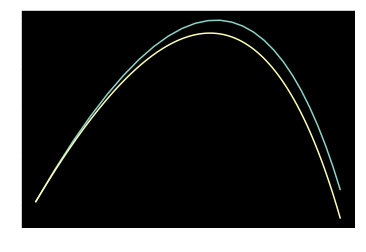

In [33]:
plt.plot(lenghts,heights)
x_analytic=np.linspace(np.min(lenghts),np.max(lenghts),100)
y_analytic=x_analytic/dof0[2]*(dof0[3]+9.8/b)+9.8/b**2*np.log(1.-b*x_analytic/dof0[2])
plt.plot(x_analytic,y_analytic)
plt.show()

Assignmnet 2B: use the bisection (or Newton's) method to compute the range of the baseball, given the initial conditions. You will need to copy here one of the two root finders from the first assignment. Moreover, you may want define a new function with the analytic expression of the function, in order to pass it to the root finder.

In [177]:
def height_linear_drag(x):
    """
    This function will compute the expression of the height of a ball subject to linear air-resistance
    as a function of its horizontal position (as reported in Eq. 3.16 of the textbook)
    I this function you can use the physical parameters of the simulaltion, as expressed in the box above
    i.e. you can use dos0, a, b, etc.
    """
    y=
    return y

SyntaxError: invalid syntax (<ipython-input-177-779e4e948bc9>, line 8)